# GNN, LSTM, GRU

In [7]:
import pandas as pd
import numpy as np
import os
import keras
import tensorflow as tf
from keras import Input, Model
from keras.layers import LSTM, GRU, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.saving import load_model

In [8]:
x_start_df_train = pd.read_csv('data/train/export_data_x_start_train_20.csv', names = list(range(1, 22, 1)))
x_end_df_train = pd.read_csv('data/train/export_data_x_end_train_20.csv', names = list(range(1, 22, 1)))
y_start_df_train = pd.read_csv('data/train/export_data_y_start_train_20.csv', names = list(range(1, 22, 1)))
y_end_df_train = pd.read_csv('data/train/export_data_y_end_train_20.csv', names = list(range(1, 22, 1)))

In [9]:
x_start_df_train
# Cordinate of cars at the start of the time interval

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1,-1,-1,1037,1037,1037,1038,1038,1038,1038,...,1038,1037,1038,1037,1038,1038,1038,1038,1038,1038
1,-1,-1,1037,1037,1037,1038,1038,1038,1038,1038,...,1037,1038,1037,1038,1038,1038,1038,1038,1038,1038
2,-1,1037,1037,1037,1038,1038,1038,1038,1038,1038,...,1038,1037,1038,1038,1038,1038,1038,1038,1038,1038
3,1037,1037,1038,1038,1038,1038,1038,1038,1037,1038,...,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038
4,1037,1038,1038,1038,1038,1038,1038,1037,1038,1037,...,1038,1038,1038,1038,1038,1038,1038,1038,1038,1038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745193,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,...,1048,1048,1048,1048,1048,1048,1048,1048,1048,1049
745194,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,...,1048,1048,1048,1048,1048,1048,1048,1048,1049,1048
745195,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,...,1048,1048,1048,1048,1048,1048,1048,1049,1048,1048
745196,1048,1048,1048,1048,1048,1048,1048,1048,1048,1048,...,1048,1048,1048,1048,1048,1048,1049,1048,1048,1048


In [10]:
x_end_df_train

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1,-1,-1,1054,1055,1055,1055,1055,1055,1055,...,1055,1054,1055,1054,1055,1055,1055,1055,1055,1055
1,1055,1055,1055,1055,1055,1055,1055,1055,1054,1055,...,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055
2,1055,1055,1055,1055,1055,1055,1054,1055,1054,1055,...,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055
3,1055,1055,1055,1055,1054,1055,1054,1055,1055,1055,...,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055
4,1055,1055,1055,1054,1055,1054,1055,1055,1055,1055,...,1055,1055,1055,1055,1055,1055,1055,1055,1055,1055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745193,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
745194,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
745195,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
745196,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,...,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080


In [11]:
y_start_df_train

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,345,345,345,345,345,345,345,345,345,346,...,346,345,345,345,345,345,345,345,345,346
1,345,345,345,345,345,345,346,345,346,345,...,345,345,345,345,345,345,346,346,346,346
2,345,345,345,345,345,346,345,346,345,345,...,345,345,345,345,345,346,346,346,346,346
3,345,345,345,345,346,345,346,345,345,345,...,345,345,345,345,346,346,346,346,346,345
4,345,345,346,345,346,345,345,345,345,345,...,345,345,346,346,346,346,346,345,345,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745193,402,402,402,402,402,402,402,402,402,402,...,402,402,402,402,402,402,402,402,402,402
745194,402,402,402,402,402,402,402,402,402,402,...,402,402,402,402,402,402,402,402,402,402
745195,402,402,402,402,402,402,402,402,402,402,...,402,402,402,402,402,402,402,402,402,402
745196,402,402,402,402,402,402,402,402,402,402,...,402,402,402,402,402,402,402,402,402,402


In [12]:
y_end_df_train

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-1,-1,394,394,394,394,394,394,394,394,...,395,395,395,395,395,395,395,395,395,395
1,-1,394,394,394,394,394,394,394,394,395,...,395,395,395,395,395,395,395,395,395,395
2,394,394,394,394,394,394,394,394,395,395,...,395,395,395,395,395,395,395,395,395,394
3,394,394,394,394,394,394,395,395,395,395,...,395,395,395,395,395,395,395,394,394,394
4,394,394,394,394,394,395,395,395,395,395,...,395,395,395,395,395,395,394,394,394,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745193,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461
745194,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461
745195,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461
745196,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461


In [13]:
# Deal with missing values
# pooling left
# pooling right
def deal_with_interuption(table_name):
  """
  Use queue to store -1 index until we find a non -1 index
  we will fill the -1 index with the non -1 index
  And we continue the process until we reach the end of the table
  """

  ori_table = table_name.to_numpy()
  table = ori_table.reshape((ori_table.shape[0]*ori_table.shape[1],))

  queue = []

  for idx, index in enumerate(table):
    if index == -1:
      queue.append(idx)

  while len(queue) != 0:
    top = queue[0]
    queue.pop(0)

    if top == len(table) - 1:
      table[top] = table[top - 1]
      if table[top] == -1:
        queue.append(top)
      continue

    if table[top + 1] > -1:
      table[top] = table[top + 1]
    else:
      if top != 0:
        table[top] = table[top - 1]


    if table[top] == -1:
      queue.append(top)

  table = table.reshape((ori_table.shape[0], ori_table.shape[1]))
  return table

In [14]:
# fill -1
x_start_df_train = deal_with_interuption(x_start_df_train)
x_end_df_train = deal_with_interuption(x_end_df_train)
y_start_df_train = deal_with_interuption(y_start_df_train)
y_end_df_train = deal_with_interuption(y_end_df_train)


In [15]:
x_start_df_train

array([[1037, 1037, 1037, ..., 1038, 1038, 1038],
       [1038, 1037, 1037, ..., 1038, 1038, 1038],
       [1037, 1037, 1037, ..., 1038, 1038, 1038],
       ...,
       [1048, 1048, 1048, ..., 1049, 1048, 1048],
       [1048, 1048, 1048, ..., 1048, 1048, 1048],
       [1048, 1048, 1048, ..., 1048, 1048, 1049]], dtype=int64)

In [16]:
x_center_df_train = pd.read_csv('data/train/my_x_center_train_20.csv', names = list(range(1, 22, 1))).to_numpy()
y_center_df_train = pd.read_csv('data/train/my_y_center_train_20.csv', names = list(range(1, 22, 1))).to_numpy()

## Build model
### NN

In [41]:
# instead use class like pytorch we can use function to create the model
def simple_NN(input_shape = (20, 1)):
    #input layer
    input = keras.Input(shape=input_shape)
    #20 frames, 1 feature (the cordinate of the car)
    #flatten the input

    #flatten the input
    x = Dense(16, activation='relu')(input) 
    # nn.Linrear(numper of node input, number of node output)
    # Dense(number of node output, activation function)

    #drop out to avoid overfitting
    x = Dropout(0.2)(x)
    #Dropout(percentage of node to drop)

    x = Dense(8, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(1, activation = "linear")(x)
    model = Model(inputs=input, outputs=output)
    model.summary()

    return model


## Vanilla_LSTM

In [18]:
# instead use class like pytorch we can use function to create the model
def simple_vanilla_LSTM(input_shape = (20, 1)):
    #input layer
    input = keras.Input(shape=input_shape)
    #20 frames, 1 feature (the cordinate of the car)
    #flatten the input

    x = LSTM(8)(input)
    #flatten the input
    x = Dense(4, activation='relu')(x) 
    # nn.Linrear(numper of node input, number of node output)
    # Dense(number of node output, activation function)

    #drop out to avoid overfitting
    x = Dropout(0.35)(x)
    #Dropout(percentage of node to drop)
    x = Dense(1, activation='linear')(x)
    model = Model(inputs=input, outputs=x)
    model.summary()

    return model


In [19]:
vanilla = simple_vanilla_LSTM()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
nn = simple_NN()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 20, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20, 16)         │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20, 8)          │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 20, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20, 1)          │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

## Train model

In [20]:
# (xI - xmin) / (xmax - xmin)
# min max scaler

In [21]:
def my_min_max_scaler(data, max_value):
    return data / max_value

In [22]:
df_train = my_min_max_scaler(x_start_df_train, 1600.0)
X_x, y_x = df_train[:, :(df_train.shape[1] - 1)], df_train[:, (df_train.shape[1] - 1)]
# (df_train.shape[1] - 1) (withou:) keep the labels
print(X_x.shape)
print(y_x.shape)

(745198, 20)
(745198,)


In [23]:
# Split val 80/20
X_x_train, X_x_val, y_x_train, y_x_val = train_test_split(X_x, y_x, test_size=0.2, random_state=42)
X_x_train = X_x_train.reshape((X_x_train.shape[0], X_x_train.shape[1], 1))
X_x_val = X_x_val.reshape((X_x_val.shape[0], X_x_val.shape[1], 1))
print(X_x_train.shape)
print(X_x_val.shape)

(596158, 20, 1)
(149040, 20, 1)


In [49]:
# loss is MSE, optimizer is Adam
# save the best model ModelCheckpoint
vanilla.compile(loss='mse', optimizer=Adam(0.1), metrics=['accuracy'])
callback = [ModelCheckpoint(r"data/Best model for x/LSTM_x.keras", save_best_only=True, monitor="val_accuracy")]

In [50]:
# define batch size
batch_size = 64

step_per_epoch = X_x_train.shape[0] // batch_size + 1
validation_steps = X_x_val.shape[0] // batch_size + 1

history = vanilla.fit(X_x_train, y_x_train, validation_data= (X_x_val, y_x_val), epochs = 100, batch_size = 64,  validation_batch_size= 64, callbacks = callback)

Epoch 1/100
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0106 - val_accuracy: 0.0000e+00 - val_loss: 0.0103
Epoch 2/100
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0105 - val_accuracy: 0.0000e+00 - val_loss: 0.0112
Epoch 3/100
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0105 - val_accuracy: 0.0000e+00 - val_loss: 0.0104
Epoch 4/100
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0105 - val_accuracy: 0.0000e+00 - val_loss: 0.0127
Epoch 5/100
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0105 - val_accuracy: 0.0000e+00 - val_loss: 0.0105
Epoch 6/100
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0105 - val_accuracy: 0.0000e+00 - val_loss: 0.0103
Epoch 7/100
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0105 - val_accuracy: 0.0000e+00 - val_loss: 0.0103
Epoch 8/100
9315/931

KeyboardInterrupt: 

: 

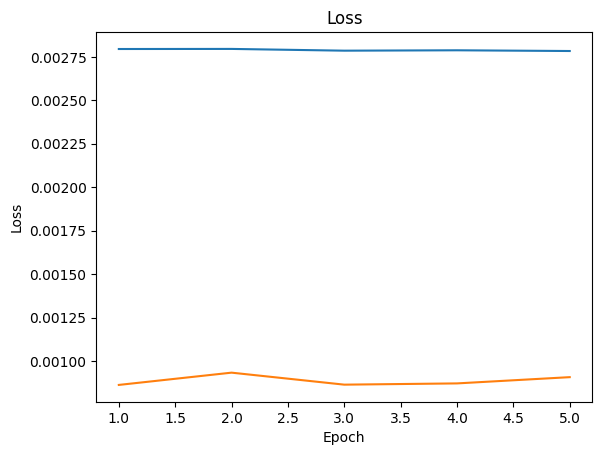

In [34]:
numOfEpoch = 5
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 5))), history.history['loss'], label='training loss')
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 5))), history.history['val_loss'], label='validation loss')
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# NN

In [43]:
nn.compile(loss = "mean_squared_error", optimizer = Adam(learning_rate = 0.001))
# callback = [ModelCheckpoint(r"data/Best model for x/nn_x.h5", save_best_only=True, monitor="val_loss")]
callback = [ModelCheckpoint(r"data/Best model for x/nn_x.keras", save_best_only=True, monitor="val_loss")]
steps_per_epoch = X_x_train.shape[0] // 64 + 1
validation_step = X_x_val.shape[0] // 64 + 1
# history = nn.fit(X_x_train, y_x_train, validation_data= (X_x_val, y_x_val), epochs = 5, batch_size = 64, steps_per_epoch = steps_per_epoch, callbacks = callback, validation_steps = validation_step)
history = nn.fit(X_x_train, y_x_train, validation_data= (X_x_val, y_x_val), epochs = 5, batch_size = 64,  validation_batch_size= 64, callbacks = callback)

Epoch 1/5
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0439 - val_loss: 0.0101
Epoch 2/5
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 3/5
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 4/5
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 5/5
9315/9315 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0102 - val_loss: 0.0101


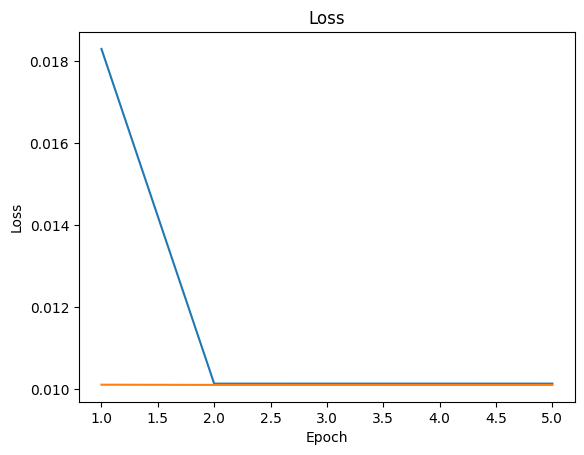

In [44]:
numOfEpoch = 5
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 5))), history.history['loss'], label='training loss')
plt.plot(list(map(int, np.linspace(1, numOfEpoch, 5))), history.history['val_loss'], label='validation loss')
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()